In [1]:
import os
import glob
import numpy as np

import pandas as pd
import dill as pkl

In [2]:
import analyze2p.utils as hutils
import analyze2p.aggregate_datasets as aggr

In [3]:
import importlib
import pylab as pl
import seaborn as sns

In [11]:
import analyze2p.gratings.bootstrap_osi as osi
import analyze2p.gratings.utils as gutils
import analyze2p.extraction.traces as traceutils

In [6]:
rootdir = '/n/coxfs01/2p-data'
traceid='traces001'
experiment = 'gratings'

responsive_test='nstds'
responsive_thr=10
response_type='dff'

In [7]:
n_bootstrap_iters=500
# n_resamples=None
n_intervals_interp=3

# Test 1 FOV

In [222]:
dk = '20190522_JC084_fov1'
session, animalid, fovnum = hutils.split_datakey_str(dk)
data_fpath = glob.glob(os.path.join(rootdir, animalid, session, 'FOV%i_*' % fovnum,
                      'combined_%s*' % experiment, 'traces/%s*' % traceid, 
                        'data_arrays', 'np_subtracted.npz'))[0]
data_fpath
traceid_dir = data_fpath.split('/data_arrays')[0]

In [239]:
rois, nrois_t, roistats = aggr.get_responsive_cells(dk, run='gratings', 
                                                   responsive_test=responsive_test,
                                                   response_type=response_type,
                                                   responsive_thr=responsive_thr, 
                                                    return_stats=True)
rstats = roistats['nframes_above']


found stats:
 ['/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_55a5cc_traces001_7eef99_traces001_809b80_traces001_fbc03e/summary_stats/nstds/nstds-2.50_results.pkl']


In [225]:
importlib.reload(aggr)

<module 'analyze2p.aggregate_datasets' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/aggregate_datasets.py'>

In [224]:
stat_dir = os.path.join(traceid_dir, 'summary_stats', responsive_test)
stats_fpath = glob.glob(os.path.join(stat_dir, \
                        '%s-%.2f_result*.pkl' % (responsive_test, 2.5)))
stats_fpath


['/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_55a5cc_traces001_7eef99_traces001_809b80_traces001_fbc03e/summary_stats/nstds/nstds-2.50_results.pkl']

In [227]:
session, animalid, fovn = hutils.split_datakey_str(dk)
fov = 'FOV%i_zoom2p0x' % fovn
fdf = aggr.calculate_nframes_above_nstds(animalid, session, fov, run='gratings',
                               create_new=True)
    


... Testing responsive (n_stds=2.50)
... Saved: /n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_55a5cc_traces001_7eef99_traces001_809b80_traces001_fbc03e/summary_stats/nstds/nstds-2.50_results.pkl


In [229]:
fdf[30].loc[cfgs_]

config001     0
config009     1
config017     4
config025     0
config033     2
config041     4
config049    13
config057     2
Name: 30, dtype: int64

In [411]:
importlib.reload(traceutils)

<module 'analyze2p.extraction.traces' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/extraction/traces.py'>

In [412]:
%matplotlib notebook

In [488]:
print(data_fpath)
raw_traces, labels, sdf, run_info = traceutils.load_dataset(data_fpath, 
                                                    trace_type='corrected')

/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_55a5cc_traces001_7eef99_traces001_809b80_traces001_fbc03e/data_arrays/np_subtracted.npz


In [489]:
processed, metrics = aggr.process_traces(raw_traces, labels, 
                        trace_type='dff', 
                        response_type='dff', trial_epoch='stimulus')
 

--- processed traces: dff


In [490]:
# meanr, stdr, t = traceutils.get_mean_and_std_traces(roi, processed, 
#                                                     labels, cfgs_, sdf)
# # 

## Test 1 cell

In [491]:
min_nframes_above=10
min_cfgs_above=1

In [492]:
for ckey, g in sdf.groupby(['sf', 'size', 'speed']):
    currcfgs = g.sort_values(by='ori').index.tolist()
    print(ckey)

(0.1, 20.0, 10)
(0.1, 20.0, 20)
(0.1, 200.0, 10)
(0.1, 200.0, 20)
(0.5, 20.0, 10)
(0.5, 20.0, 20)
(0.5, 200.0, 10)
(0.5, 200.0, 20)


In [609]:
# rid = 30 #155
# ckey = (0.1, 20.0, 10)
# # ckey = (0.1, 20.0, 20)

# rid = 91 #155
# ckey = (0.5, 20.0, 10)

rid = 54 #155
ckey = (0.5, 200.0, 20)


# rid = 40 #155
# ckey = (0.5, 20.0, 20)

# rid = 75 #155
# ckey = (0.1, 200.0, 10)

cfgs_ = sorted([g for g, (sf, sz, sp) in sdf[['sf', 'size', 'speed']].iterrows() \
         if tuple([sf, sz, sp])==ckey])
cfgs_

['config008',
 'config016',
 'config024',
 'config032',
 'config040',
 'config048',
 'config056',
 'config064']

In [610]:
import analyze2p.gratings.bootstrap_osi as osi

<IPython.core.display.Javascript object>


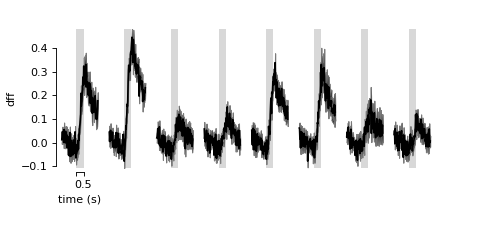

In [611]:
fig = pl.figure(figsize=(6,3))
osi.plot_psth_roi(rid, processed, labels, cfgs_, sdf,  
                  trace_type='dff', fig=fig,
                  nr=1, nc=8)
pl.subplots_adjust(bottom=0.3, right=0.9)
# ax.set_ylim([-0.03, 0.08])

In [595]:
# stim_on_frame = int(labels['stim_on_frame'].unique())
# nframes_on = int(labels['nframes_on'].unique())

In [572]:
# metric_ixs = np.arange(stim_on_frame, stim_on_frame+nframes_on).astype(int)
# metric_ixs

In [485]:
# metrics_list=[]
# for (trial, cfg), tmat in labels.groupby(['trial', 'config']):
#     if cfg not in cfgs_:
#         continue
#     raw_ = raw_traces.iloc[tmat.index]
#     stim_mean = raw_.iloc[metric_ixs].mean(axis=0)
#     bas_mean = raw_.iloc[0:stim_on_frame].mean(axis=0)
#     curr_metrics = (stim_mean-bas_mean) / bas_mean
#     curr_metrics['config'] = cfg
#     metrics_list.append(curr_metrics)


In [486]:
# trial_metrics = pd.concat(metrics_list, axis=1).T
# roi_list = raw_traces.columns.tolist()

# trial_metrics[roi_list] = trial_metrics[roi_list].astype(float)

In [496]:
# meanr = trial_metrics[['config', rid]].groupby('config').mean().values
# #eanr2 = rdf[['config', roi]].groupby('config').mean().values
# fig, ax =pl.subplots()
# ax.plot(meanr)
# ax.plot(meanr2)


In [497]:
# roi_df = metrics[[roi, 'config']].copy()
# meanr2 = roi_df[roi_df.config.isin(cfgs_)].groupby('config').mean()

In [498]:
print(rid)

roi_df = metrics[[rid, 'config']].copy()
#roi_df[rid]-= roi_df[rid].min()

rdf = roi_df[roi_df['config'].isin(cfgs_)]
rdf.shape
# roi = int([r for r in rdf.columns if r not in ['config', 'trial']][0])
print(roi)

responsive = len(np.where(rstats[rid].loc[cfgs_]>=min_nframes_above)[0])\
                >=min_cfgs_above
responsive

30
30


True

In [430]:
rdf = roi_df[roi_df['config'].isin(cfgs_)]
roi = int([r for r in rdf.columns if r not in ['config', 'trial']][0])

responses_df = pd.concat([pd.Series(g[rid], name=c).reset_index(drop=True) \
              for c, g in rdf.groupby(['config'])], axis=1).dropna(axis=0)


<IPython.core.display.Javascript object>


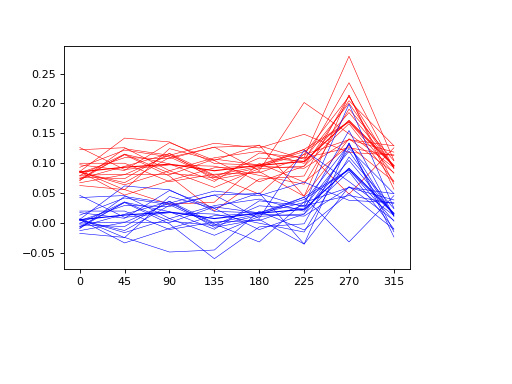

[Text(0, 0, '0'),
 Text(1, 0, '45'),
 Text(2, 0, '90'),
 Text(3, 0, '135'),
 Text(4, 0, '180'),
 Text(5, 0, '225'),
 Text(6, 0, '270'),
 Text(7, 0, '315')]

In [284]:
fig, ax =pl.subplots()
ax.plot(responses_df.T, color='r', lw=0.5)
ax.plot(responses_df.mean(axis=0), lw=1, color='r')

ax.plot(responses_df2.T, color='b', lw=0.5)
ax.plot(responses_df2.mean(axis=0), lw=1, color='b')

pl.subplots_adjust(bottom=0.3, right=0.8)
ax.set_xticklabels(sdf.loc[cfgs_]['ori'].values)

In [296]:
n_resamples = responses_df.shape[0]
bootdf_tmp2 = pd.concat([responses_df2.sample(n_resamples, replace=True).mean(axis=0) \
                        for ni in range(n_bootstrap_iters)], axis=1)
print(bootdf_tmp.shape)
bootdf_tmp.head()

<module 'analyze2p.gratings.bootstrap_osi' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/gratings/bootstrap_osi.py'>

In [297]:
bootdf_tmp.index = [sdf['ori'][c] for c in bootdf_tmp.index]      
#bootdf = (bootdf_tmp-bootdf_tmp.min()) #- (bootdf_tmp-bootdf_tmp.mean()).min() 


In [298]:
fitp2 = bootdf_tmp.apply(osi.do_fit, args=[n_intervals_interp], axis=0) 

In [313]:
importlib.reload(osi)

<module 'analyze2p.gratings.bootstrap_osi' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/gratings/bootstrap_osi.py'>

In [573]:
del roi

NameError: name 'roi' is not defined

In [612]:
del roi_df
del bootdf_tmp
del bootdf
del fitp

roi_df = metrics[[rid, 'config']].copy()
print(rid)
fits={}
responses = {}
for i in np.arange(0, 4):
    roi_df = metrics[[rid, 'config']].copy()
#     if i==2: # Half-rectify
#         if roi_df[rid].min()<0:
#             resp_ = roi_df[rid].copy()
#             resp_[resp_<0] = 0
#             roi_df[rid] = resp_.values
#     if i==1: #Add min.
#         if roi_df[rid].min()<0:
#             roi_df[rid]-= roi_df[rid].min()
        
    rdf = roi_df[roi_df['config'].isin(cfgs_)].copy()
    responses_df = pd.concat([pd.Series(g[rid], name=c).reset_index(drop=True) \
                  for c, g in rdf.groupby(['config'])], axis=1).dropna(axis=0)
    if i==1: # subtract from raw
        if responses_df.min().min()<0:
            responses_df -= responses_df.min().min()
            
    n_resamples = responses_df.shape[0]
    # Sample
    bootdf_tmp = pd.concat([responses_df.sample(n_resamples, replace=True)\
                            .mean(axis=0) \
                            for ni in range(n_bootstrap_iters)], axis=1)
    print(i, bootdf_tmp.shape)
    bootdf_tmp.index = [sdf['ori'][c] for c in bootdf_tmp.index]      
    if bootdf_tmp.min().min()<0:
        minvs = bootdf_tmp.min()
        fix_these = minvs[minvs<0].index.to_list()
        if i==2: # subtract min
            bootdf_tmp[fix_these] -= minvs.loc[fix_these]
        elif i==3: # half-rectify
            for f in fix_these:
                vs = bootdf_tmp[f]
                bootdf_tmp.loc[vs<0, f] = 0
    else:
        print("Not neg.")
    bootdf = bootdf_tmp.copy()
        
    check_offset = False
    fitp = bootdf.apply(osi.do_fit, args=[n_intervals_interp, check_offset], axis=0) 
    
    fits[i] = fitp
    responses[i] = responses_df

54
0 (8, 500)
1 (8, 500)
Not neg.
2 (8, 500)
3 (8, 500)


<IPython.core.display.Javascript object>


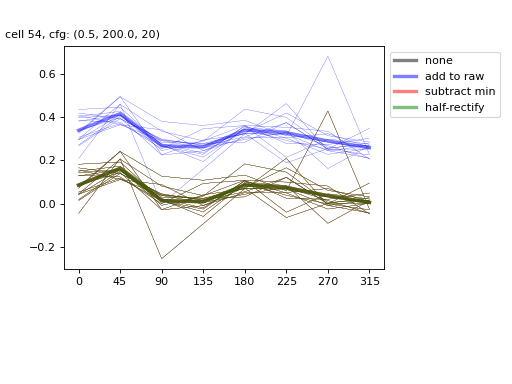

0 (17, 8)
1 (17, 8)
2 (17, 8)
3 (17, 8)


Text(0.01, 0.9, 'cell 54, cfg: (0.5, 200.0, 20)')

In [613]:
%matplotlib notebook

colors={0: 'k', 1: 'b', 2: 'r',  3:'g'}
offset_labels={0: 'none', 1: 'add to raw', 2: 'subtract min', 3: 'half-rectify'}
fig, ax =pl.subplots()
for i, resps in responses.items():
    print(i, resps.shape)
    ax.plot(resps.T, color=colors[i], lw=0.2)
    ax.plot(resps.mean(axis=0), lw=3, color=colors[i],label=offset_labels[i],
           alpha=0.5)

# ax.plot(responses_df2.T, color='b', lw=0.5)
# ax.plot(responses_df2.mean(axis=0), lw=1, color='b')
ax.legend(bbox_to_anchor=(1,1), loc='upper left')
pl.subplots_adjust(bottom=0.3, right=0.75)
ax.set_xticklabels(sdf.loc[cfgs_]['ori'].values)

fig.text(0.01, 0.9, 'cell %i, cfg: %s' % (rid, str(ckey)))

In [614]:
f_=[]
for i, fitp in fits.items():
    fp = fitp.T
    fp['offset'] = offset_labels[i]
    f_.append(fp)
allfits = pd.concat(f_, axis=0)

allfits.head()

,response_pref,response_null,theta_pref,sigma,response_offset,asi,dsi,circvar_asi,circvar_dsi,offset
0,0.121809,0.069142,36.897144,26.685196,0.023061,0.643182,0.282921,0.817004,0.609978,none
1,0.146984,0.105195,28.996282,35.974257,-0.004152,0.551496,0.217403,0.802642,0.507234,none
2,0.144498,0.110085,30.177252,35.786565,-0.003267,0.551132,0.185807,0.832177,0.512946,none
3,0.145890,0.085285,30.488828,32.297274,0.010030,0.578896,0.292927,0.766358,0.549720,none
4,0.114310,0.060589,38.100351,32.215319,0.036558,0.564824,0.318525,0.829773,0.722641,none


<IPython.core.display.Javascript object>


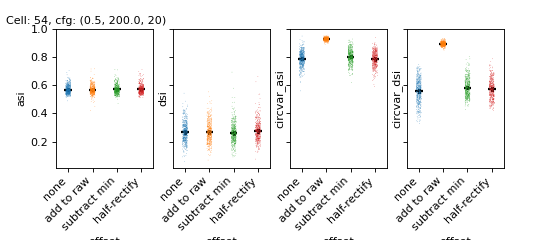

Text(0.01, 0.9, 'Cell: 54, cfg: (0.5, 200.0, 20)')

In [615]:
params = ['asi', 'dsi', 'circvar_asi', 'circvar_dsi']
fig, axn = pl.subplots(1,len(params), sharex=True, sharey=True, figsize=(7,3))
for ax, param in zip(axn.flat, params):
    sns.stripplot(x='offset', y=param, data = allfits, ax=ax, 
                  s=1, marker='.') #order=params)
    sns.pointplot(x='offset', y=param, data = allfits, ax=ax, 
                  join=False, color='k', markers='_')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
pl.subplots_adjust(left=0.1, bottom=0.3, )
fig.text(0.01, 0.9, 'Cell: %i, cfg: %s' % (rid, str(ckey)))

In [299]:
fitp2

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
response_pref,0.069232,0.096971,6.413242e-02,0.077575,0.071372,0.068201,0.085073,0.062380,0.070772,0.069301,...,0.098659,0.072988,7.324297e-02,0.059098,0.064527,0.106184,0.075672,0.081314,0.063500,0.074174
response_null,0.003158,0.016009,2.473681e-12,0.009276,0.007601,0.012366,0.005894,0.002091,0.006835,0.008803,...,0.007162,0.000934,1.439880e-12,0.007210,0.005087,0.011202,0.006225,0.013925,0.012866,0.007692
theta_pref,267.615284,268.494342,2.660676e+02,269.007899,269.293169,267.452519,269.707813,263.792658,267.391370,270.112321,...,268.267109,268.469528,2.686355e+02,264.594604,267.581020,267.209186,267.352884,268.173656,267.142609,269.781423
sigma,28.677972,22.500000,2.352956e+01,22.500000,22.500000,22.500000,22.500000,32.513246,24.115158,22.500000,...,22.543235,22.500000,2.354299e+01,28.511740,23.153889,22.500000,22.979060,24.464792,27.234735,22.781918
response_offset,0.008141,0.005314,6.932403e-03,0.011912,0.011898,0.006688,0.012363,0.005028,0.011845,0.008903,...,0.007779,0.012858,7.173840e-03,0.012509,0.009847,0.006538,0.006877,0.004506,0.010400,0.011771
asi,0.612923,0.735927,7.135470e-01,0.735982,0.736030,0.735823,0.735788,0.537910,0.704178,0.736150,...,0.734802,0.734814,7.131886e-01,0.621855,0.722789,0.735709,0.726253,0.698405,0.648373,0.730737
dsi,0.815479,0.664625,9.190463e-01,0.729393,0.749038,0.642659,0.807140,0.817226,0.756734,0.718608,...,0.801424,0.902725,9.189161e-01,0.705645,0.788485,0.750220,0.783899,0.649618,0.603324,0.752234
circvar_asi,0.493262,0.494808,4.561623e-01,0.619084,0.626251,0.586992,0.576383,0.416406,0.613130,0.591698,...,0.462396,0.581587,4.337305e-01,0.654037,0.589240,0.453805,0.494591,0.499307,0.661791,0.613657
circvar_dsi,0.633906,0.450005,5.932201e-01,0.634900,0.653078,0.540886,0.633155,0.626250,0.659075,0.599436,...,0.520000,0.680823,5.757125e-01,0.713884,0.642204,0.474760,0.545460,0.470619,0.653543,0.644581


In [118]:
import multiprocessing as mp
from functools import partial

In [138]:
df_split[0]

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.033890,0.036062,0.040407,0.026756,0.049468,0.042526,0.046552,0.028232,0.027478,0.034716,...,0.037277,0.039056,0.035932,0.031530,0.030651,0.015132,0.026986,0.031181,0.024104,0.031087
45,0.024115,0.000000,0.024949,0.000000,0.000000,0.013200,0.009970,0.000000,0.001175,0.000000,...,0.010499,0.010241,0.011222,0.001518,0.002721,0.000000,0.015794,0.009444,0.000000,0.005750
90,0.024004,0.015263,0.000000,0.007354,0.038334,0.000000,0.019196,0.004953,0.022114,0.005857,...,0.000000,0.000000,0.026827,0.014272,0.020728,0.003224,0.000000,0.005937,0.010168,0.013419
135,0.045555,0.037227,0.043704,0.000361,0.049557,0.042756,0.056472,0.057175,0.022392,0.015550,...,0.010926,0.043508,0.064435,0.017359,0.010694,0.020996,0.019844,0.000000,0.003121,0.039132
180,0.031354,0.038986,0.058195,0.008634,0.026092,0.054004,0.026835,0.028811,0.012915,0.039247,...,0.004696,0.040769,0.015689,0.004415,0.014890,0.052610,0.053368,0.017018,0.027021,0.015736
225,0.045694,0.038601,0.056413,0.063760,0.074884,0.046838,0.042428,0.056853,0.035424,0.052759,...,0.017880,0.028326,0.070371,0.063008,0.079229,0.068102,0.033995,0.020297,0.054879,0.032588
270,0.040686,0.020227,0.032579,0.008166,0.028911,0.055796,0.012183,0.014933,0.000000,0.037090,...,0.017455,0.022112,0.000000,0.000000,0.000000,0.017443,0.027699,0.009775,0.008525,0.005419
315,0.000000,0.018131,0.047938,0.022842,0.013155,0.020822,0.000000,0.000611,0.000967,0.026151,...,0.003772,0.009759,0.011146,0.008389,0.027473,0.038059,0.047415,0.015633,0.015888,0.000000


In [77]:
tested_oris=sorted(sdf['ori'].unique())

fitv = fitp.apply(osi.fit_from_params, args=[tested_oris], axis=0)  

In [81]:
yvs = bootdf.apply(osi.interp_values, args=[n_intervals_interp, True], 
                   axis=0) # result_type='reduce')   

In [83]:
fitp = fitp.T

In [84]:
r2s = osi.get_r2(fitv, yvs)


In [94]:
res = osi.bootstrap_fit_by_config(roi_df, sdf=sdf, statdf=rstats)

KeyboardInterrupt: 

# Test running multiple

In [432]:
%%timeit
rdf_list = [metrics[[roi, 'config']] for roi in rois[0:6]]
res = osi.bootstrap_osi_mp(rdf_list, sdf, statdf=rstats, params=fitparams,
                          n_processes=4)
# response_type=response_type,
#                  n_bootstrap_iters=n_bootstrap_iters, n_resamples=n_resamples,
#                  n_intervals_interp=3, min_cfgs_above=2, 
#                  min_nframes_above=10, n_processes=4)

Process-52 (52,)
Process-53 (53,)
Process-54 (54,)
Process-55 (55,)
--> (cell 9, 1 cfgs) Elapsed: 130.18sec
--> (cell 0, 2 cfgs) Elapsed: 340.69sec
--> (cell 12, 2 cfgs) Elapsed: 370.84sec
--> (cell 5, 1 cfgs) Elapsed: 137.49sec
--> (cell 14, 2 cfgs) Elapsed: 251.16sec
--> (cell 11, 5 cfgs) Elapsed: 560.31sec
BOOTSTRAP ANALYSIS COMPLETE.
Process-56 (56,)
Process-57 (57,)
Process-58 (58,)
Process-59 (59,)
--> (cell 9, 1 cfgs) Elapsed: 122.01sec
--> (cell 0, 2 cfgs) Elapsed: 307.95sec
--> (cell 12, 2 cfgs) Elapsed: 335.10sec
--> (cell 5, 1 cfgs) Elapsed: 134.41sec
--> (cell 14, 2 cfgs) Elapsed: 234.76sec
--> (cell 11, 5 cfgs) Elapsed: 514.59sec
BOOTSTRAP ANALYSIS COMPLETE.
Process-60 (60,)
Process-61 (61,)
Process-62 (62,)
Process-63 (63,)
--> (cell 9, 1 cfgs) Elapsed: 122.80sec
--> (cell 0, 2 cfgs) Elapsed: 308.27sec
--> (cell 12, 2 cfgs) Elapsed: 335.37sec
--> (cell 5, 1 cfgs) Elapsed: 134.67sec
--> (cell 14, 2 cfgs) Elapsed: 235.58sec
--> (cell 11, 5 cfgs) Elapsed: 516.21sec
BOOTSTRAP

Process Process-81:
Process Process-82:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/gratings/bootstrap_osi.py", line 586, in worker
    with open(roi_outfile, 'wb') as f:
  File "/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/gratings/bootstrap_osi.py", line 546, in bo

***Terminating!


KeyboardInterrupt: 

In [440]:
importlib.reload(osi)

<module 'analyze2p.gratings.bootstrap_osi' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/gratings/bootstrap_osi.py'>

In [442]:
fitparams

{'directory': '/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_55a5cc_traces001_7eef99_traces001_809b80_traces001_fbc03e/tuning/fit-dff_responsive-nstds-2.50-thr10.00_boot-1000-resample-20',
 'min_cfgs_above': 1,
 'min_nframes_above': 10,
 'n_bootstrap_iters': 1000,
 'n_intervals_interp': 3,
 'n_resamples': 20,
 'n_stds': 2.5,
 'non_ori_configs': [[0.1, 200.0, 10],
  [0.1, 200.0, 20],
  [0.1, 20.0, 10],
  [0.1, 20.0, 20],
  [0.5, 200.0, 10],
  [0.5, 200.0, 20],
  [0.5, 20.0, 10],
  [0.5, 20.0, 20]],
 'response_type': 'dff',
 'responsive_test': 'nstds',
 'responsive_thr': 10.0}

In [443]:
rdf_list = [metrics[[roi, 'config']] for roi in rois[0:2]]
res = osi.pool_bootstrap(rdf_list, sdf, statdf=rstats, params=fitparams, n_processes=4)

TypeError: list indices must be integers or slices, not str

In [584]:
importlib.reload(osi)
from analyze2p.extraction import traces as traces

In [585]:
# if not os.path.exists(os.path.join(fitparams['directory'], 'roi-fits', 'files')):
#     os.makedirs(os.path.join(fitparams['directory'], 'roi-fits', 'files'))

In [586]:
# r = osi.bootstrap_fit_by_config(roi_df, sdf=sdf, statdf=rstats, params=fitparams,
#                            create_new=True)


In [587]:
bootresults = osi.pool_bootstrap(rdf_list, sdf, statdf=rstats, params=fitparams,
                             n_processes=2, create_new=True)


In [589]:
passrois = sorted([k for k, v in bootresults.items() if any(v.values())])


In [590]:
%matplotlib notebook

<IPython.core.display.Javascript object>


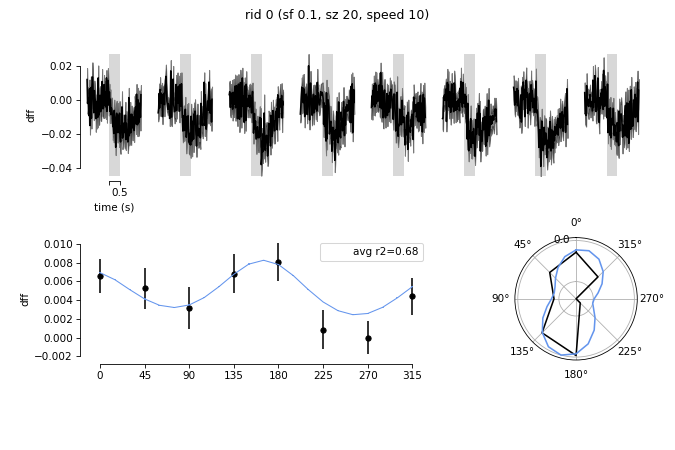

plotting roi 0
[  0  45  90 135 180 225 270 315]


<IPython.core.display.Javascript object>


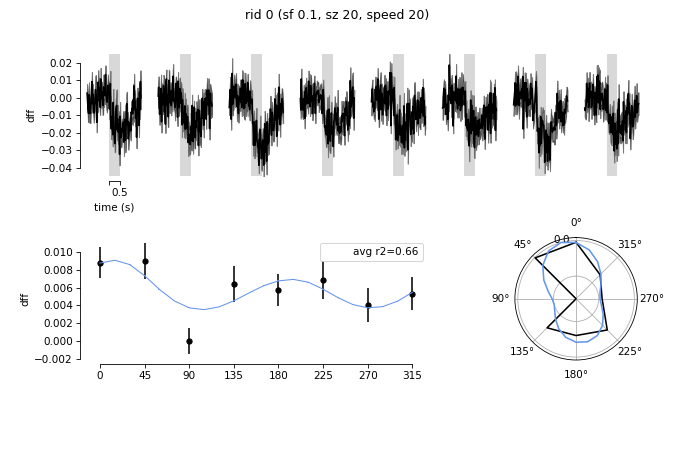

plotting roi 0
[  0  45  90 135 180 225 270 315]


In [591]:
roi=passrois[0]
for stimparam, bootr in bootresults[roi].items():
    fig, stimkey = osi.plot_tuning_fits(roi, bootr, processed, labels, sdf)
    

In [553]:
importlib.reload(osi)

<module 'analyze2p.gratings.bootstrap_osi' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/gratings/bootstrap_osi.py'>

In [554]:
bootr['data']['responses'].mean(axis=0)

config006   -0.012122
config014   -0.011912
config022   -0.020905
config030   -0.014527
config038   -0.015196
config046   -0.014052
config054   -0.016858
config062   -0.015621
dtype: float64

<IPython.core.display.Javascript object>


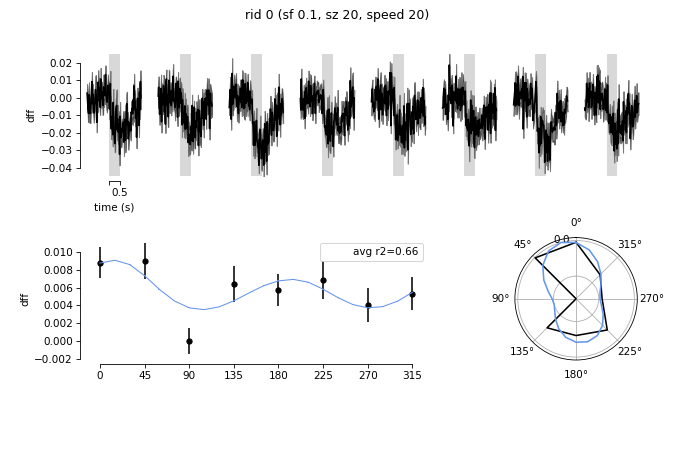

plotting roi 0
[  0  45  90 135 180 225 270 315]


(<Figure size 900x600 with 10 Axes>, 'sf-0.1-sz-20-speed-20')

In [594]:
osi.plot_tuning_fits(roi, bootr, processed, labels, sdf, trace_type='dff')

In [556]:
%matplotlib notebook

In [595]:
responses_df = bootr['data']['responses']  
curr_cfgs = responses_df.columns.tolist() 
curr_oris = np.array([sdf['ori'][c] for c in curr_cfgs])    
mean_responses = responses_df.mean(axis=0)  
curr_resps = (mean_responses - mean_responses.min())
curr_sems = responses_df.std(axis=0)       


<IPython.core.display.Javascript object>


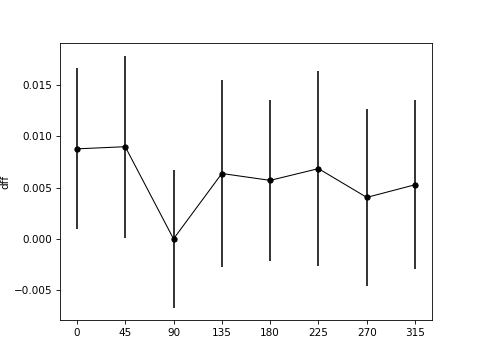

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:ylabel='dff'>)

In [596]:
osi.plot_tuning_curve_roi(curr_oris, curr_resps, curr_sems=curr_sems)

In [597]:
resps_fit = bootr['fits']['fitv'].mean(axis=1)
resps_fit_sem = bootr['fits']['fitv'].sem(axis=1, skipna=True)

In [598]:
oris_interp = bootr['fits']['xv']
n_intervals_interp = bootr['fits']['n_intervals_interp']
oris_interp

[0.0,
 15.0,
 30.0,
 45.0,
 60.0,
 75.0,
 90.0,
 105.0,
 120.0,
 135.0,
 150.0,
 165.0,
 180.0,
 195.0,
 210.0,
 225.0,
 240.0,
 255.0,
 270.0,
 285.0,
 300.0,
 315.0,
 330.0,
 345.0,
 360.0]

In [599]:
sdf['ori'].unique()

array([0, 90, 135, 45, 270, 315, 180, 225], dtype=object)

In [600]:
n_intervals_interp
#tested_oris = sorted(sdf['ori'].uniqu())    
tested_oris = sdf['ori'].unique()
tested_oris
xvs = osi.interp_values(tested_oris, n_intervals=n_intervals_interp,wrap_value=360)
xvs

[0.0,
 30.0,
 60.0,
 90.0,
 105.0,
 120.0,
 135.0,
 105.0,
 75.0,
 45.0,
 120.0,
 195.0,
 270.0,
 285.0,
 300.0,
 315.0,
 270.0,
 225.0,
 180.0,
 195.0,
 210.0,
 225.0,
 270.0,
 315.0,
 360.0]

<IPython.core.display.Javascript object>


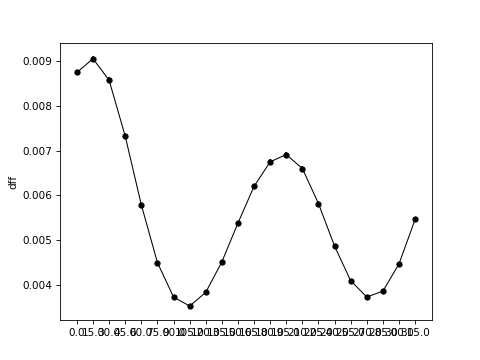

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:ylabel='dff'>)

In [601]:
osi.plot_tuning_curve_roi(oris_interp[0:-n_intervals_interp],
                      resps_fit[0:-n_intervals_interp],
                      curr_sems=resps_fit_sem[0:-n_intervals_interp])

## Test evaluation

In [606]:
importlib.reload(osi)

<module 'analyze2p.gratings.bootstrap_osi' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/gratings/bootstrap_osi.py'>

In [607]:
fit_desc = gutils.get_fit_desc(response_type=response_type,
                              responsive_test=responsive_test, 
                              responsive_thr=responsive_thr)

In [608]:
bootresults, fitparams = osi.load_tuning_results(datakey=dk, fit_desc=fit_desc,
                                                verbose=True)
len(bootresults.keys())

... loading existing fits


115

In [609]:
passdf = evaldf[evaldf['cell'].isin(rmetrics['cell'].unique())].copy()   
df_ = pd.concat([g for (c, stim), g in passdf.groupby(['cell', 'stimulus'])
                 if stim==rmetrics[rmetrics['cell']==c]['stimulus'].values[0]])

ValueError: No objects to concatenate

In [616]:
for (c, stim), g in passdf.groupby(['cell', 'stimulus']):
    if stim==str(rmetrics[rmetrics['cell']==c]['stimulus'].values[0]):
        print(c, stim)

16 (0.5, 20.0, 10.0)
17 (0.5, 20.0, 10.0)
30 (0.1, 20.0, 10.0)
40 (0.5, 20.0, 20.0)
45 (0.1, 20.0, 20.0)
49 (0.1, 20.0, 10.0)
51 (0.1, 20.0, 10.0)
54 (0.5, 200.0, 20.0)
59 (0.5, 20.0, 10.0)
67 (0.1, 20.0, 20.0)
68 (0.1, 20.0, 20.0)
69 (0.5, 200.0, 20.0)
73 (0.1, 200.0, 20.0)
91 (0.5, 20.0, 10.0)
93 (0.1, 20.0, 20.0)
98 (0.1, 20.0, 20.0)
106 (0.1, 20.0, 20.0)
135 (0.1, 20.0, 20.0)
137 (0.1, 200.0, 20.0)
144 (0.1, 200.0, 20.0)
147 (0.5, 20.0, 20.0)
151 (0.1, 20.0, 20.0)
156 (0.1, 20.0, 20.0)
163 (0.1, 20.0, 20.0)
166 (0.1, 200.0, 20.0)
173 (0.1, 20.0, 10.0)
205 (0.5, 20.0, 20.0)
206 (0.1, 20.0, 10.0)
210 (0.1, 20.0, 20.0)
215 (0.1, 20.0, 20.0)
231 (0.5, 20.0, 10.0)
232 (0.5, 20.0, 10.0)
234 (0.1, 20.0, 10.0)
235 (0.1, 200.0, 20.0)
241 (0.5, 20.0, 20.0)
247 (0.1, 200.0, 20.0)
255 (0.5, 20.0, 10.0)


('(',
 '0',
 '.',
 '5',
 ',',
 ' ',
 '2',
 '0',
 '.',
 '0',
 ',',
 ' ',
 '2',
 '0',
 '.',
 '0',
 ')')

In [253]:
bootresults[91].keys()

dict_keys([(0.5, 20.0, 10.0), (0.5, 20.0, 20.0)])

In [251]:
evaldf = osi.aggregate_evalation(bootresults, fitparams)

... aggregating (113 cells attempted)
... aggregating (107 cells fit at least 1 tuning curve).


In [367]:
gof_thr=0.66

rmetrics, rmetrics_all_cfgs = osi.get_good_fits(bootresults, fitparams)
strong_fits = rmetrics['cell'].unique()
plotresults = dict((k, bootresults[k]) for k in strong_fits)


... 37 (of 113) fitable cells pass GoF thr 0.66


In [369]:
# evaldf[(evaldf['gof']>=gof_thr) & (evaldf['cell']==91)]

In [249]:

df_ = evaldf[evaldf['cell'].isin(rmetrics['cell'].unique())]

In [163]:
importlib.reload(osi)

<module 'analyze2p.gratings.bootstrap_osi' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/gratings/bootstrap_osi.py'>

... plotted: compare-bootstrapped-metrics_fit-thr0.66


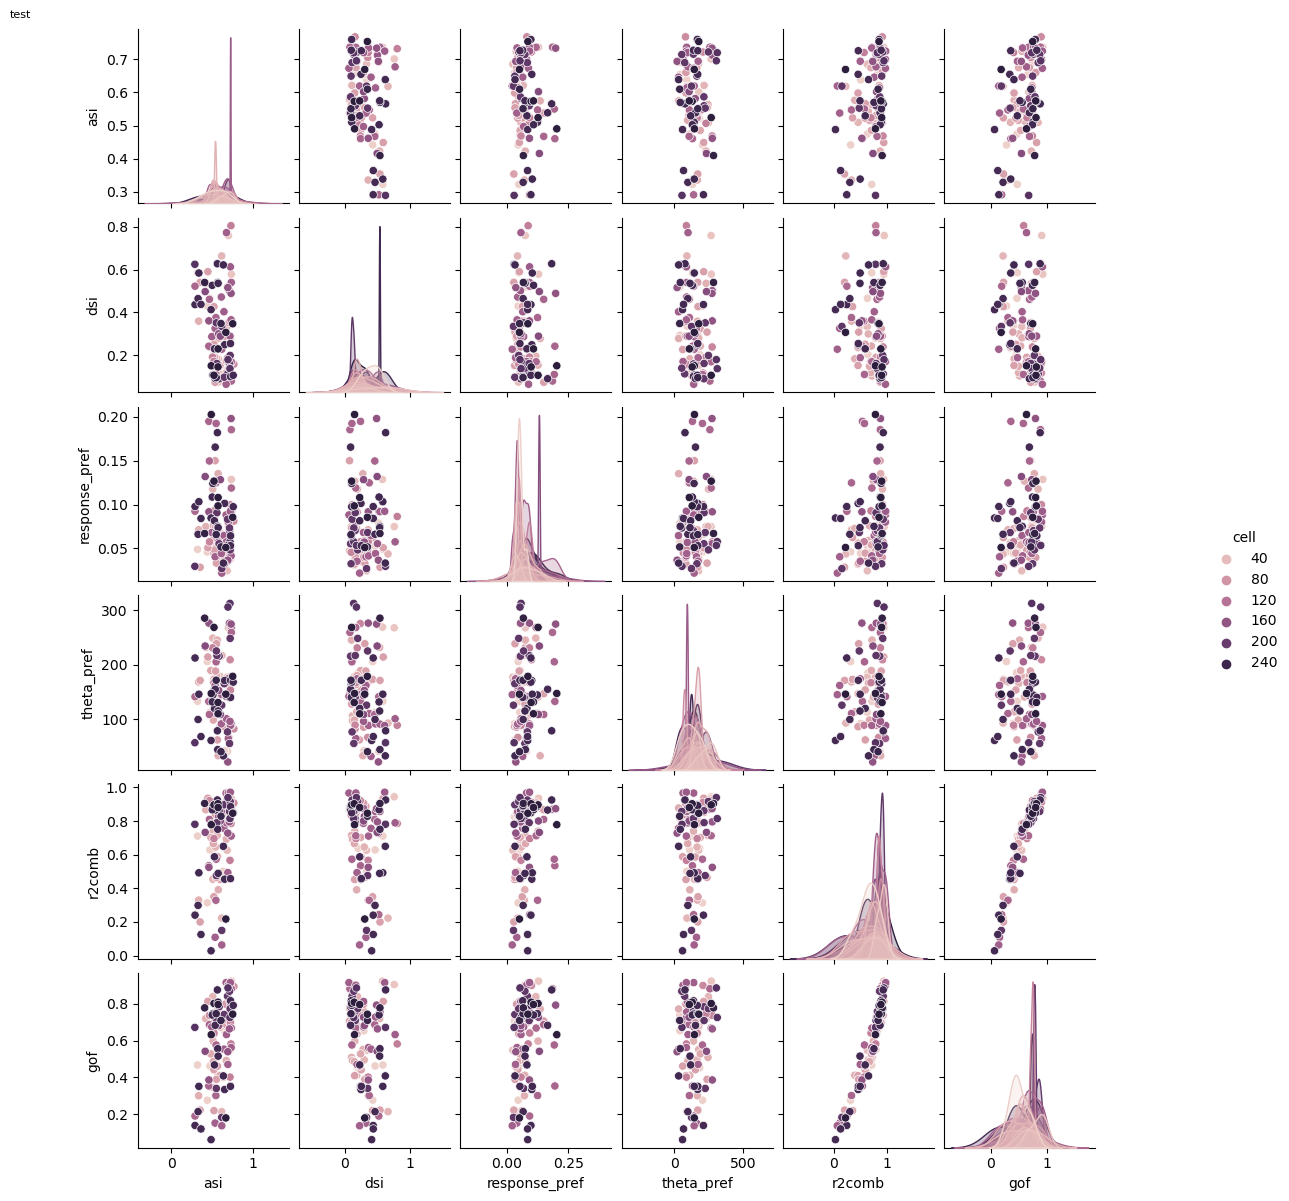

In [164]:
osi.plot_bootstrapped_params(df_, fitparams, fit_metric='gof', 
                             fit_thr=gof_thr, data_id='test', return_fig=True)

In [ ]:
metrics_to_plot = ['asi', 'dsi', 'response_pref', 'theta_pref', 'r2comb', 'gof'] 
#metrics_to_plot.append('cell')
#g = sns.PairGrid(df_, hue='cell', vars=metrics_to_plot) #=['asi', 'dsi', 'r2comb'])
# g = sns.pairplot(df_, height=2, aspect=1, hue='cell', vars=metrics_to_plot)

In [313]:
rmetrics
passdf = evaldf[evaldf['cell'].isin(rmetrics['cell'].unique())].copy()
plotdf = pd.concat([g for (c, stim), g in passdf.groupby(['cell', 'stimulus'])
           if stim==rmetrics[rmetrics['cell']==c]['stimulus'].values[0]])
plotdf[plotdf['cell']==91]

,asi,dsi,response_null,response_offset,response_pref,sigma,theta_pref,r2,cell,r2comb,gof,stimulus
0,0.769430,0.193840,0.065124,0.010919,0.076999,22.5,0.402616,0.920400,91,0.906539,0.892685,"(0.5, 20.0, 10.0)"
1,0.768411,0.162506,0.082272,0.005593,0.090786,22.5,1.186447,0.951746,91,0.906539,0.892685,"(0.5, 20.0, 10.0)"
2,0.767580,0.132269,0.088568,0.006075,0.085765,22.5,179.220197,0.950585,91,0.906539,0.892685,"(0.5, 20.0, 10.0)"
3,0.771645,0.268880,0.055312,0.004343,0.077542,22.5,0.433719,0.966101,91,0.906539,0.892685,"(0.5, 20.0, 10.0)"
4,0.770339,0.228940,0.064579,0.011432,0.082643,22.5,-1.262244,0.942429,91,0.906539,0.892685,"(0.5, 20.0, 10.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.772487,0.300655,0.054771,0.003116,0.082740,22.5,1.029139,0.978562,91,0.906539,0.892685,"(0.5, 20.0, 10.0)"
996,0.765008,0.044462,0.071188,0.008363,0.083311,22.5,180.236403,0.983029,91,0.906539,0.892685,"(0.5, 20.0, 10.0)"
997,0.770754,0.239433,0.061899,0.008470,0.081102,22.5,0.622080,0.949590,91,0.906539,0.892685,"(0.5, 20.0, 10.0)"
998,0.764083,0.015247,0.082826,0.001603,0.103182,22.5,179.151791,0.986114,91,0.906539,0.892685,"(0.5, 20.0, 10.0)"


In [353]:
importlib.reload(osi)
%matplotlib notebook

In [315]:
plotd, top_asi, top_dsi = osi.sort_by_selectivity(plotdf, topn=5)

<IPython.core.display.Javascript object>


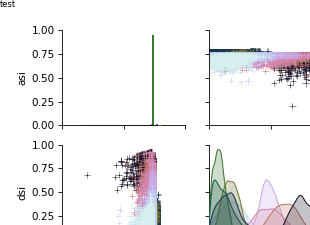

<IPython.core.display.Javascript object>


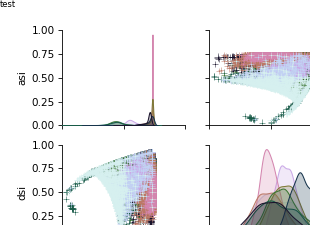

(<Figure size 553.25x400 with 6 Axes>, <Figure size 553.25x400 with 6 Axes>)

In [328]:
osi.plot_top_asi_and_dsi(plotdf, fitparams,
                         data_id='test', return_figs=True)

In [336]:
importlib.reload(osi)
%matplotlib notebook

<IPython.core.display.Javascript object>


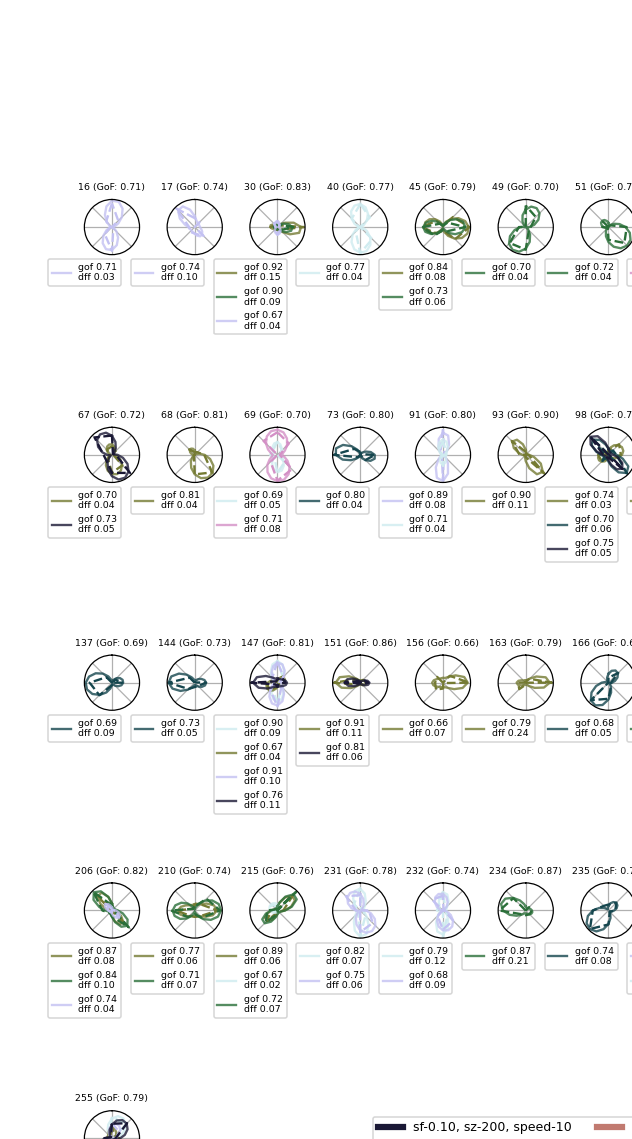

In [338]:
fg = osi.polar_plots_all_configs(rmetrics_all_cfgs, plotresults, fitparams, gof_thr=gof_thr)
pl.subplots_adjust(hspace=0.5, wspace=0.5, left=0.1, right=0.95, bottom=0.2, top=0.9)

In [260]:
%matplotlib notebook

In [261]:
top_asi

[91, 151, 93, 156, 107]

In [262]:
top_dsi

[44, 132, 5, 151, 115]

In [317]:
importlib.reload(osi)
%matplotlib notebook

<IPython.core.display.Javascript object>


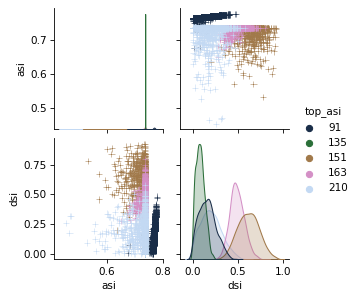

In [325]:
hue='top_asi'
g = sns.pairplot(plotd[plotd[hue]!=str(-10)], hue=hue, vars=['asi', 'dsi'], 
                 palette='cubehelix', size=2, markers='+')

#                  scatter_kws={'s': 2, 'marker_edgewidth':0})
#=0)


In [407]:
importlib.reload(osi)
%matplotlib notebook

In [401]:
skey = list(bootresults[roi].keys())[0]


In [408]:


rmetrics, rmetrics_all_cfgs = osi.get_good_fits(bootresults, fitparams)
strong_fits = rmetrics['cell'].unique()
plotresults = dict((k, bootresults[k]) for k in strong_fits)


... 37 (of 113) fitable cells pass GoF thr 0.66


In [409]:
for (roi, skey), g in rmetrics_all_cfgs.groupby(['cell', 'stimulus']):
    g

In [410]:
bootr = bootresults[roi][skey]      

In [411]:
bootresults[roi].keys()

dict_keys([(0.1, 200.0, 20.0), (0.5, 20.0, 20.0), (0.1, 20.0, 20.0), (0.1, 20.0, 10.0), (0.5, 20.0, 10.0), (0.1, 200.0, 10.0)])

sf-0.5-sz-20-speed-20


<IPython.core.display.Javascript object>


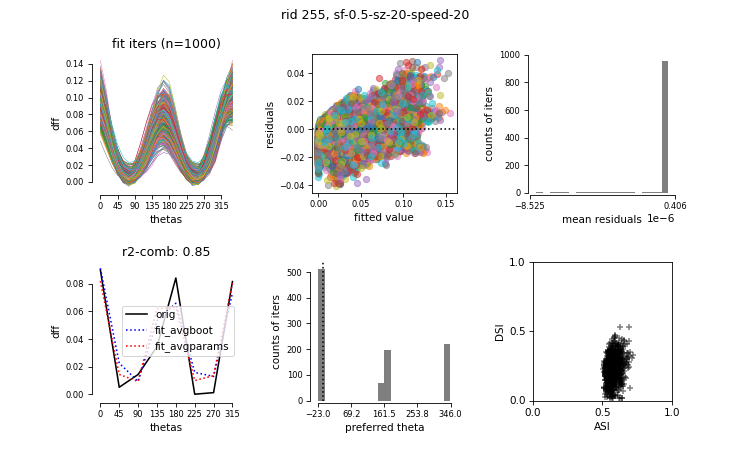

<IPython.core.display.Javascript object>


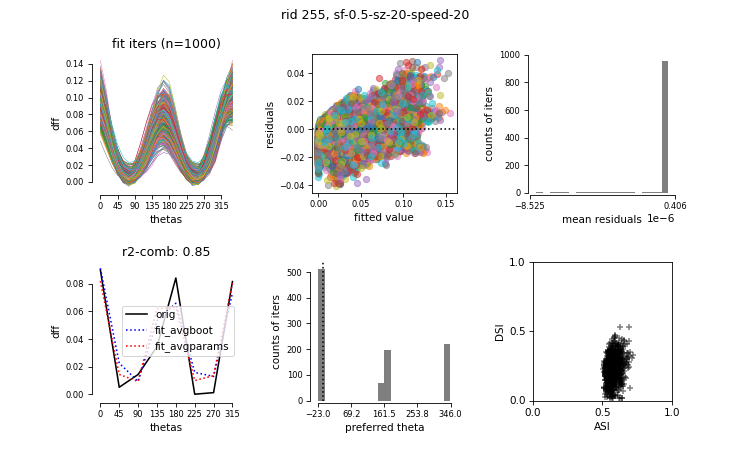

In [415]:
stimkey = 'sf-%.1f-sz-%i-speed-%i' % skey   
print(stimkey)

osi.plot_evaluation_results(roi, bootr, fitparams, param_str=stimkey)

In [390]:
skey

'(0.5, 20.0, 20.0)'